In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set_context('paper')

import spacy
from spacy import displacy

nlp = spacy.load("en")

In [2]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 83.0.4103
[WDM] - Get LATEST driver version for 83.0.4103


[WDM] - Get LATEST driver version for 83.0.4103
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/83.0.4103.39/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\SHRENI\.wdm\drivers\chromedriver\win32\83.0.4103.39]


In [3]:
driver.get("https://www.analyticsvidhya.com/blog/2020/01/3-important-nlp-libraries-indian-languages-python/")

In [4]:
content = driver.page_source
soup = BeautifulSoup(content)

In [5]:
all_paras = soup.find_all('p')

In [6]:
text = ''
for p in all_paras:
    text += p.get_text()

In [7]:
print(text)

-->















[UnLock2020] Starter Program in Machine Learning | Flat 75% OFF - Offer Ending Soon

 Language is a wonderful tool of communication – its powered the human race for centuries and continues to be at the heart of our culture. The sheer amount of languages in the world dwarf our ability to master them all.In fact, a person born and brought up in part of the country might struggle to communicate with a fellow person from a different state (yes, I’m talking about India!). It’s a challenge a lot of us face in today’s borderless world.This is a research area that Natural Language Processing (NLP) techniques have not yet managed to master. The majority of breakthroughs and state-of-the-art frameworks we see are developed in the English language. I have long wondered if we could use that and build NLP applications in vernacular languages.Human beings by nature are diverse and multilingual, so it makes sense, right?Since the Indian subcontinent itself has a multitude of langua

# Using Spacy

In [8]:
document = nlp(text)
displacy.render(document, style = "ent",jupyter = True)

In [9]:
entities=[(str(i), i.label_) for i in document.ents]
print(entities)
entities_df = pd.DataFrame(entities, columns =['Entity', 'Label'])
entities_df.head()

[('75%', 'PERCENT'), ('Language', 'PERSON'), ('centuries', 'DATE'), ('India', 'GPE'), ('today', 'DATE'), ('English', 'LANGUAGE'), ('Indian', 'NORP'), ('more than a billion', 'CARDINAL'), ('NLP', 'ORG'), ('The Indian Subcontinent', 'ORG'), ('Wikipedia', 'PERSON'), ('Indian', 'NORP'), ('the Indian Ocean: Bangladesh', 'LOC'), ('Bhutan', 'GPE'), ('India', 'GPE'), ('Maldives', 'GPE'), ('Nepal', 'GPE'), ('Pakistan', 'GPE'), ('Sri Lanka', 'GPE'), ('India', 'GPE'), ('Python', 'GPE'), ('Indian', 'NORP'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('Indian', 'NORP'), ('NLTK Python', 'PRODUCT'), ('NLP', 'ORG'), ('PyTorch', 'ORG'), ('first', 'ORDINAL'), ('first', 'ORDINAL'), ('12', 'CARDINAL'), ('Hindi', 'GPE'), ('a Language Model', 'PRODUCT'), ('first', 'ORDINAL'), ('5', 'CARDINAL'), ('Hindi', 'PERSON'), ('Malayalam', 'ORG'), ('GloVe', 'PERSON'), ('two', 'CARDINAL'), ('one', 'CARDINAL'), ('Notice', 'ORG'), ('400', 'CARDINAL'), ('one', 'CARDINAL'), ('Bengali', 'NORP'), ('fourth', 'ORDINAL'), ('Goog

,Entity,Label
0,75%,PERCENT
1,Language,PERSON
2,centuries,DATE
3,India,GPE
4,today,DATE


In [10]:
entities_df['Label'].value_counts()

CARDINAL    51
ORG         42
GPE         21
NORP        17
PERSON      14
ORDINAL     10
LANGUAGE     4
DATE         4
PRODUCT      3
QUANTITY     3
LOC          1
PERCENT      1
FAC          1
TIME         1
Name: Label, dtype: int64

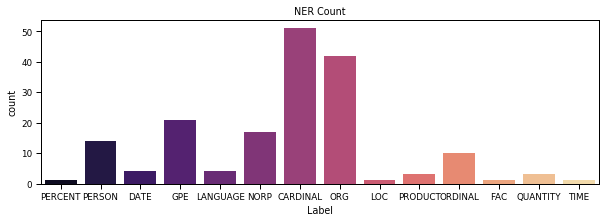

In [11]:
plt.figure(figsize=(10, 3))
sns.countplot(x = 'Label', data = entities_df, palette = 'magma')
plt.title('NER Count')
plt.show()

# Using NLTK

In [12]:
import nltk

In [13]:
tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)
ner_nltk = nltk.ne_chunk(pos_tags)

In [14]:
entities_nltk = []
for chunk in ner_nltk:
    if type(chunk) is nltk.Tree:
        t = ''.join(c[0] for c in chunk.leaves())
        entities_nltk.append((t, chunk.label()))

entities_nltk

[('UnLock2020', 'ORGANIZATION'),
 ('Machine', 'GPE'),
 ('OFF', 'ORGANIZATION'),
 ('SoonLanguage', 'PERSON'),
 ('India', 'GPE'),
 ('NaturalLanguage', 'ORGANIZATION'),
 ('NLP', 'ORGANIZATION'),
 ('English', 'GPE'),
 ('NLP', 'ORGANIZATION'),
 ('Indian', 'GPE'),
 ('NLP', 'ORGANIZATION'),
 ('Indian', 'GPE'),
 ('Wikipedia', 'PERSON'),
 ('Indian', 'GPE'),
 ('Indian', 'GPE'),
 ('Ocean', 'LOCATION'),
 ('Bhutan', 'GPE'),
 ('India', 'GPE'),
 ('Maldives', 'GPE'),
 ('Nepal', 'PERSON'),
 ('Pakistan', 'GPE'),
 ('Sri', 'PERSON'),
 ('India', 'GPE'),
 ('NLP', 'ORGANIZATION'),
 ('Indian', 'GPE'),
 ('Python', 'GPE'),
 ('NLP', 'ORGANIZATION'),
 ('Indian', 'GPE'),
 ('iNLTK', 'ORGANIZATION'),
 ('Indian', 'GPE'),
 ('NLTKPython', 'ORGANIZATION'),
 ('NLP', 'ORGANIZATION'),
 ('NLP', 'ORGANIZATION'),
 ('API', 'ORGANIZATION'),
 ('iNLTK', 'ORGANIZATION'),
 ('iNLTK', 'ORGANIZATION'),
 ('Hindi', 'GPE'),
 ('iNLTK', 'ORGANIZATION'),
 ('iNLTK', 'ORGANIZATION'),
 ('LanguageModel', 'ORGANIZATION'),
 ('iNLTK', 'ORGANIZATIO

In [15]:
entities_nltk_df = pd.DataFrame(entities_nltk, columns = ['Entity', 'Label'])
entities_nltk_df.head()

,Entity,Label
0,UnLock2020,ORGANIZATION
1,Machine,GPE
2,OFF,ORGANIZATION
3,SoonLanguage,PERSON
4,India,GPE


In [16]:
entities_nltk_df['Label'].value_counts()

ORGANIZATION    78
GPE             50
PERSON          22
LOCATION         1
Name: Label, dtype: int64

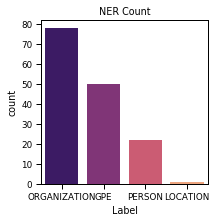

In [17]:
plt.figure(figsize=(3, 3))
sns.countplot(x = 'Label', data = entities_nltk_df, palette = 'magma')
plt.title('NER Count')
plt.show()